In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from statsmodels.stats.multitest import multipletests
import matplotlib.patches as mpatches

# Load results

In [18]:
# central_results = pd.read_csv('/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/balanced/result_deqms_cov.tsv', index_col=0, sep='\t')
# central_results = central_results.loc[:, ['logFC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B', 'sca.t', 'sca.P.Value', 'sca.adj.pval']]
# print(central_results.shape)
# central_results.head(5)


central_results = pd.read_csv('/home/yuliya/repos/cosybio/FedDEqMS/data/02_limma_(BE_or_cov)_on_all/result_deqms_HR.tsv', index_col=0, sep='\t')
central_results = central_results.loc[:, ['logFC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B']]#, 'sca.t', 'sca.P.Value', 'sca.adj.pval'
print(central_results.shape)
central_results.head(5)

(2254, 6)


,logFC,AveExpr,t,P.Value,adj.P.Val,B
PG,,,,,,
P23538,3.002096,23.965136,91.455230,3.609902e-115,8.136719e-112,253.267609
P37689,-2.692850,23.862101,-80.240217,2.804362e-108,3.160516e-105,237.489824
P22259,2.843525,24.625790,77.277822,2.650022e-106,1.991050e-103,232.957150
P0AEE5,4.853091,22.539972,76.263676,1.306953e-105,7.364681e-103,231.366141
P77318,2.933483,20.563137,71.565202,2.796594e-102,1.260705e-99,223.714462


In [19]:
fed_results = pd.read_csv('/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/balanced/results.FedProt.tsv', index_col=0, sep='\t').loc[central_results.index.values, central_results.columns.values]
print(fed_results.shape)
fed_results.head(5) 


# fed_results = pd.read_csv('/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/unbalansed/results.FedProt.tsv', index_col=0, sep='\t').loc[central_results.index.values, central_results.columns.values]
# print(fed_results.shape)
# fed_results.head(5) 

(2254, 6)


,logFC,AveExpr,t,P.Value,adj.P.Val,B
P23538,3.013399,23.894183,93.423656,1.787012e-110,4.027925e-107,242.474738
P37689,-2.696614,23.791479,-79.006473,3.259491e-102,3.673447e-99,223.583920
P22259,2.857780,24.531436,77.341460,3.628044e-101,2.725870e-98,221.184501
P0AEE5,4.872335,22.475706,77.062055,5.462762e-101,3.078267e-98,220.776864
P77318,2.941488,20.462114,67.434475,1.875034e-94,8.452653e-92,205.765320


In [20]:
# keep only shared rownames in all df
shared_rows = list(set(central_results.index) & set(fed_results.index))

central_results = central_results.loc[shared_rows]
fed_results = fed_results.loc[shared_rows]

print(central_results.shape)
print(fed_results.shape)


(2254, 6)
(2254, 6)


## Differences

In [21]:
# #to compare DEqMS parts of the results
# diff =  fed_results["sca.adj.pval"] - central_results["sca.adj.pval"]
# print("sca.adj.pval abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))
# diff =  fed_results["sca.P.Value"] - central_results["sca.P.Value"]
# print("sca.P.Value abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))
# diff =  fed_results["sca.t"] - central_results["sca.t"]
# print("sca.t abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))

In [22]:
diff =  fed_results["logFC"] - central_results["logFC"]
print("logFC abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))
diff =  fed_results["AveExpr"] - central_results["AveExpr"]
print("AveExpr abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))


logFC abs. diff.: max,mean,min: 0.38560458399848585 0.019716058752495106 2.715061970803845e-06
AveExpr abs. diff.: max,mean,min: 0.8735247825122272 0.09461679567427256 0.0007370693631649772


In [23]:
diff =  fed_results["t"] - central_results["t"]
print("t abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))
diff =  fed_results["B"] - central_results["B"]
print("B abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))

t abs. diff.: max,mean,min: 13.327662206856843 1.4497347579185362 0.0006509051411391908
B abs. diff.: max,mean,min: 38.683145077089506 7.2703338441091665 0.0005050911644328693


In [24]:
diff =  fed_results["P.Value"] - central_results["P.Value"]
print("p-value abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))
diff =  -np.log10(fed_results["P.Value"]) + np.log10(central_results["P.Value"]) 
print("log10 p-value-log abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))

p-value abs. diff.: max,mean,min: 0.8747203504773674 0.0334058460026298 1.786975722265214e-110
log10 p-value-log abs. diff.: max,mean,min: 16.785130469047772 3.208840385918956 0.0007637802695969476


In [25]:
diff =  fed_results["adj.P.Val"] - central_results["adj.P.Val"]
print("adj p-value abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))
diff =  -np.log10(fed_results["adj.P.Val"]) + np.log10(central_results["adj.P.Val"]) 
print("log10 adj p-value log abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))

adj p-value abs. diff.: max,mean,min: 0.8825722304826851 0.034076058447975274 4.027843277985793e-107
log10 adj p-value log abs. diff.: max,mean,min: 16.474760447129654 3.2034296390985335 0.0008955545303711565


## deqms part

In [26]:
central_results = pd.read_csv('/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/balanced/result_deqms_cov.tsv', index_col=0, sep='\t')
central_results = central_results.loc[:, ['logFC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B', 'sca.t', 'sca.P.Value', 'sca.adj.pval']]
print(central_results.shape)
central_results.head(5)

(2254, 9)


,logFC,AveExpr,t,P.Value,adj.P.Val,B,sca.t,sca.P.Value,sca.adj.pval
PG,,,,,,,,,
P23538,3.013399,23.894183,93.423656,1.787012e-110,4.027925e-107,242.474738,94.381096,4.090380e-112,9.219717e-109
P37689,-2.696614,23.791479,-79.006473,3.259491e-102,3.673447e-99,223.583920,-79.770210,1.031609e-103,1.162623e-100
P22259,2.857780,24.531436,77.341460,3.628044e-101,2.725870e-98,221.184501,78.068609,1.222634e-102,9.186058e-100
P0AEE5,4.872335,22.475706,77.062055,5.462762e-101,3.078267e-98,220.776864,77.632415,2.323713e-102,1.309413e-99
P77318,2.941488,20.462114,67.434475,1.875034e-94,8.452653e-92,205.765320,67.897573,1.037849e-95,4.678623e-93


In [27]:
fed_results = pd.read_csv('/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/balanced/results.FedProt.tsv', index_col=0, sep='\t').loc[central_results.index.values, central_results.columns.values]
print(fed_results.shape)
fed_results.head(5) 


# fed_results = pd.read_csv('/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/unbalansed/results.FedProt.tsv', index_col=0, sep='\t').loc[central_results.index.values, central_results.columns.values]
# print(fed_results.shape)
# fed_results.head(5) 

(2254, 9)


,logFC,AveExpr,t,P.Value,adj.P.Val,B,sca.t,sca.P.Value,sca.adj.pval
P23538,3.013399,23.894183,93.423656,1.787012e-110,4.027925e-107,242.474738,94.381096,4.090380e-112,9.219717e-109
P37689,-2.696614,23.791479,-79.006473,3.259491e-102,3.673447e-99,223.583920,-79.770210,1.031609e-103,1.162623e-100
P22259,2.857780,24.531436,77.341460,3.628044e-101,2.725870e-98,221.184501,78.068609,1.222634e-102,9.186058e-100
P0AEE5,4.872335,22.475706,77.062055,5.462762e-101,3.078267e-98,220.776864,77.632415,2.323713e-102,1.309413e-99
P77318,2.941488,20.462114,67.434475,1.875034e-94,8.452653e-92,205.765320,67.897573,1.037849e-95,4.678623e-93


In [28]:
# keep only shared rownames in all df
shared_rows = list(set(central_results.index) & set(fed_results.index))

central_results = central_results.loc[shared_rows]
fed_results = fed_results.loc[shared_rows]

print(central_results.shape)
print(fed_results.shape)


(2254, 9)
(2254, 9)


In [29]:
#to compare DEqMS parts of the results
diff =  fed_results["sca.adj.pval"] - central_results["sca.adj.pval"]
print("sca.adj.pval abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))
diff =  fed_results["sca.P.Value"] - central_results["sca.P.Value"]
print("sca.P.Value abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))
diff =  fed_results["sca.t"] - central_results["sca.t"]
print("sca.t abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))

sca.adj.pval abs. diff.: max,mean,min: 1.3281598043590748e-12 3.650948128821511e-14 0.0
sca.P.Value abs. diff.: max,mean,min: 1.283417816466681e-12 3.3892408126511715e-14 0.0
sca.t abs. diff.: max,mean,min: 3.879563337250147e-12 4.661324797352034e-13 0.0


# Plots

t abs. diff.: max,mean,min: 3.851141627819743e-12 4.659264621300324e-13 0.0
p-value abs. diff.: max,mean,min: 1.283417816466681e-12 3.3892408126511715e-14 0.0


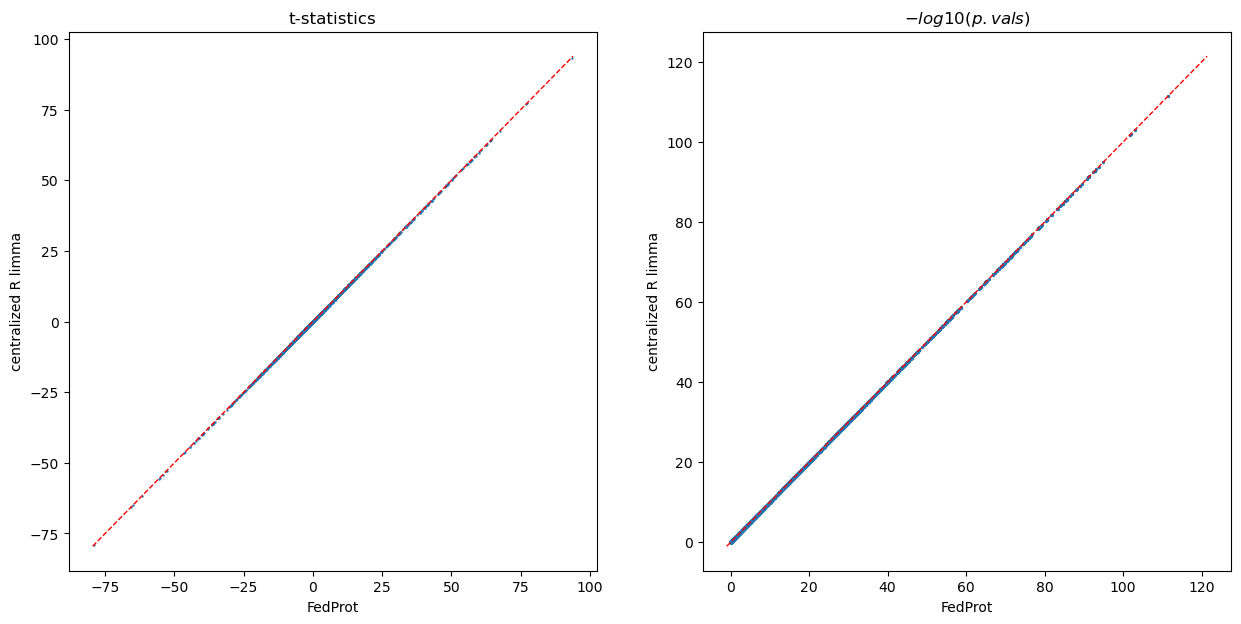

In [30]:
result = fed_results.loc[central_results.index.values,:] # result of FedProt arranges in the same order as limma_table

fig, axes = plt.subplots(1, 2, figsize=(15,7), sharey=False)
axes[0].set_title("t-statistics")
axes[0].scatter(x=result["t"], y = central_results["t"],s=0.5)
xmin = np.min(result["t"])
xmax = np.max(result["t"])
ymin = np.min(central_results["t"])
ymax = np.max(central_results["t"])
axes[0].plot([xmin-0.5,xmax+0.5],[xmin-0.5,xmax+0.5],color = "red", linestyle='dashed',linewidth=1)
axes[0].set_xlabel('FedProt')
axes[0].set_ylabel('centralized R limma')

axes[1].set_title("$-log10(p.vals)$")
axes[1].scatter(x=-np.log10(result["sca.P.Value"]), y = -np.log10(central_results["sca.P.Value"].values),s=2)
axes[1].set_xlabel('FedProt')

xmax = max(-np.log10(result["sca.P.Value"]))
ymax = max(-np.log10(central_results["sca.P.Value"].values))
axes[1].plot([-1,xmax+10],[-1,ymax+10],color = "red", linestyle='dashed',linewidth=1)
tmp = axes[1].set_ylabel('centralized R limma')

diff =  result["t"] - central_results["t"]
print("t abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))
diff =  result["sca.P.Value"] - central_results["sca.P.Value"]
print("p-value abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))

logFC abs. diff.: max,mean,min: 7.460698725481052e-14 1.740384661340369e-14 0.0
p-value abs. diff.: max,mean,min: 1.2915224445464446e-12 3.3904307285611275e-14 0.0


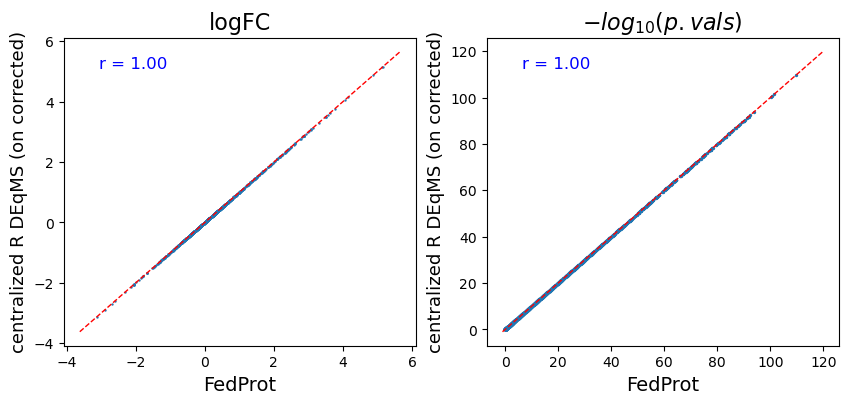

In [31]:
result = fed_results.loc[central_results.index.values,:] # result of FedProt arranges in the same order as limma_table

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=False)
axes[0].set_title("logFC", fontsize=16)
axes[0].scatter(x=result["logFC"], y = central_results["logFC"],s=0.5)

# Calculate the Pearson correlation coefficients
corr_coeff_logFC = np.corrcoef(result["logFC"], central_results["logFC"])[0,1]
corr_coeff_pvals = np.corrcoef(-np.log10(result["P.Value"]), -np.log10(central_results["P.Value"].values))[0,1]

# Add correlation coefficient to the plots using annotate
axes[0].annotate(f'r = {corr_coeff_logFC:.2f}', 
                 xy=(0.1, 0.9), xycoords='axes fraction', 
                 fontsize=12, color='blue')

axes[1].annotate(f'r = {corr_coeff_pvals:.2f}', 
                 xy=(0.1, 0.9), xycoords='axes fraction', 
                 fontsize=12, color='blue')


xmin = np.min(result["logFC"])
xmax = np.max(result["logFC"])
ymin = np.min(central_results["logFC"])
ymax = np.max(central_results["logFC"])
axes[0].plot([xmin-0.5,xmax+0.5],[xmin-0.5,xmax+0.5],color = "red", linestyle='dashed',linewidth=1)
axes[0].set_xlabel('FedProt', fontsize=14)
axes[0].set_ylabel('centralized R DEqMS (on corrected)', fontsize=13)


# Improve title aesthetics
axes[1].set_title("$-log_{10}(p.vals)$", fontsize=16)
axes[1].scatter(x=-np.log10(result["P.Value"]), y = -np.log10(central_results["P.Value"].values),s=2)
axes[1].set_xlabel('FedProt', fontsize=14)

xmax = max(-np.log10(result["P.Value"]))
ymax = max(-np.log10(central_results["P.Value"].values))
axes[1].plot([-1,xmax+10],[-1,ymax+10],color = "red", linestyle='dashed',linewidth=1)
tmp = axes[1].set_ylabel('centralized R DEqMS (on corrected)', fontsize=13)


diff =  result["logFC"] - central_results["logFC"]
print("logFC abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))
diff =  result["P.Value"] - central_results["P.Value"]
print("p-value abs. diff.: max,mean,min:", np.max(np.abs(diff)),np.mean(np.abs(diff)),np.min(np.abs(diff)))

In [32]:
central_results

,logFC,AveExpr,t,P.Value,adj.P.Val,B,sca.t,sca.P.Value,sca.adj.pval
PG,,,,,,,,,
P61949,0.015345,23.747985,0.462312,6.447289e-01,6.724752e-01,-8.659907,0.458251,6.476239e-01,6.748702e-01
P23882,0.118379,22.089815,4.677971,7.946100e-06,1.223395e-05,1.334864,4.673320,8.002761e-06,1.232119e-05
P0ADX1,-0.159964,21.697619,-4.242287,4.491827e-05,6.643424e-05,-0.335747,-4.240457,4.485092e-05,6.637818e-05
P22106,-0.582574,23.065547,-21.947651,5.684256e-43,4.890196e-42,86.774272,-22.192865,1.037981e-43,9.033236e-43
P28904,-2.044902,18.786597,-44.472760,2.110556e-74,7.928657e-73,159.516204,-44.698472,2.647928e-75,9.784312e-74
...,...,...,...,...,...,...,...,...,...
P0ABB4,0.397172,25.645866,15.855137,9.740323e-31,4.783157e-30,58.468114,16.054343,2.471957e-31,1.224569e-30
P15286,-0.311862,18.341956,-8.271058,3.184123e-13,7.141307e-13,18.127774,-8.233852,3.575540e-13,8.011199e-13
P39383,0.036782,18.040720,0.334920,7.383649e-01,7.578664e-01,-8.530480,0.335931,7.375944e-01,7.570755e-01


# Plots

In [33]:
# ! cp /home/yuliya/repos/cosybio/FedDEqMS/data/03_labs_for_meta/balanced/MA* /home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/balanced
# ! cp /home/yuliya/repos/cosybio/FedDEqMS/data/03_labs_for_meta/unbalanced/MA* /home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/unbalanced
# ! cp /home/yuliya/repos/cosybio/FedDEqMS/data/03_labs_for_meta/subsampled/MA* /home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/subsampled

# ! cp /home/yuliya/repos/cosybio/FedDEqMS/data/03_labs_for_meta/03_scap_as_Pval/balanced/MA* /home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation_on_scap/balanced
# ! cp /home/yuliya/repos/cosybio/FedDEqMS/data/03_labs_for_meta/03_scap_as_Pval/unbalanced/MA* /home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation_on_scap/unbalanced
# ! cp /home/yuliya/repos/cosybio/FedDEqMS/data/03_labs_for_meta/03_scap_as_Pval/subsampled/MA* /home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation_on_scap/subsampled

# Fig 2

In [34]:
def read_results(workdir):
    df = {}
    offset = np.finfo(float).tiny # replace zero pvals with this value
    
    rlimma = pd.read_csv(workdir+"/result_deqms_cov.tsv", sep="\t", index_col=0)
    #rlimma = rlimma.applymap(lambda x: float(x.replace(",",".")))
    rlimma.loc[rlimma["adj.P.Val"]==0,"adj.P.Val"] = offset
    df["pv_Rlimma"] = -np.log10(rlimma["adj.P.Val"])
    df["lfc_Rlimma"] = rlimma["logFC"]

    # Fisher
    ma_cm = pd.read_csv(workdir+"/MA_CM.tsv", sep="\t")
    ma_cm.index = ma_cm["Symbol"].values
    df["lfc_Fisher"] = ma_cm["metafc"]
    if_passed, adj_pval,alphacSidak,alphacBonf = multipletests(ma_cm["metap"].values, alpha=0.05, method='fdr_bh',
                                           is_sorted=False, returnsorted=False)
    adj_pval[adj_pval==0] = offset
    df["pv_Fisher"] = -np.log10(pd.Series(adj_pval,index=ma_cm["metap"].index))

    # REM
    ma_rem = pd.read_csv(workdir+"/MA_REM.tsv", sep="\t")
    ma_rem.index = ma_rem["Symbol"].values
    df["lfc_REM"] = ma_rem["randomSummary"]
    if_passed, adj_pval, alphacSidak, alphacBonf = multipletests(ma_rem["randomP"].values, alpha=0.05, method='fdr_bh',
                                           is_sorted=False, returnsorted=False)
    adj_pval[adj_pval==0] = offset
    df["pv_REM"] = -np.log10(pd.Series(adj_pval,index=ma_rem["randomP"].index))

    # fedprot
    fedprot = pd.read_csv(workdir+"/results.FedProt.tsv", sep="\t", index_col=0)
    fedprot.loc[fedprot["adj.P.Val"]==0, "adj.P.Val"] = offset
    df["pv_FedProt"] = -np.log10(fedprot["adj.P.Val"])
    df["lfc_FedProt"] = fedprot["logFC"]

    ### Stoufer 
    stoufer  = pd.read_csv(workdir+"/MA_Stouffer.tsv", sep="\t", index_col=0)
    stoufer.loc[stoufer["FDR"]==0,"FDR"] = offset
    df["pv_Stouffer"] = -np.log10(stoufer["FDR"])
    df["lfc_Stouffer"] = df["lfc_Fisher"]  # take logFC from MetaVolcanoR
    ### RankProd
    rankprod  = pd.read_csv(workdir+"/MA_RankProd.tsv", sep="\t", index_col=0)
    rankprod["FDR"] = rankprod.loc[:,["down_reg.FDR","up_reg.FDR"]].min(axis=1)
    rankprod.loc[rankprod["FDR"]==0,"FDR"] = offset
    df["pv_RankProd"] = -np.log10(rankprod["FDR"])
    df["lfc_RankProd"] = rankprod["avgL2FC"] 
    
    df = pd.DataFrame.from_dict(df)
    df = df.dropna(axis=0)
    return df

In [35]:
# root_dir = "/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation_on_scap/"
root_dir = "/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/"

colors = ["#000000","#E69F00", "#CC79A7", "#009E73","#56B4E9"]

dfs = {}

workdir = root_dir + "balanced"
df = read_results(workdir)
dfs["Balanced"] = df

workdir = root_dir + "subsampled"
df = read_results(workdir)
dfs["Subsampled"] = df


workdir = root_dir + "unbalanced"
df = read_results(workdir)
dfs["Imbalanced"] = df


print(df.shape)
df.head(10)

(2254, 12)


,pv_Rlimma,lfc_Rlimma,lfc_Fisher,pv_Fisher,lfc_REM,pv_REM,pv_FedProt,lfc_FedProt,pv_Stouffer,lfc_Stouffer,pv_RankProd,lfc_RankProd
O32583,2.282765,0.466615,0.509979,2.301217,0.437165,1.700293,2.282765,0.466615,1.137687,0.509979,0.909751,0.509979
P00350,6.396133,-0.209138,-0.203998,22.496880,-0.203596,1.598929,6.396133,-0.209138,11.255741,-0.203998,0.617152,-0.203998
P00363,0.349137,0.060080,0.054221,1.661608,0.071031,0.279945,0.349137,0.060080,0.771159,0.054221,0.170797,0.054221
P00370,10.578483,-0.531623,-0.528624,20.422076,-0.485344,7.683167,10.578483,-0.531623,10.960748,-0.528624,1.864947,-0.528624
P00393,2.194612,-0.140274,-0.136620,1.985360,-0.087582,1.940714,2.194612,-0.140274,1.105783,-0.136620,0.411567,-0.136620
P00448,13.100917,0.716935,0.705436,23.916855,0.705313,7.281646,13.100917,0.716935,12.166514,0.705436,1.355905,0.705436
P00452,0.494034,0.062004,0.075436,5.737061,0.095371,0.456312,0.494034,0.062004,3.266977,0.075436,0.175415,0.075436
P00490,29.165824,-0.877759,-0.881061,62.566881,-0.844246,117.175108,29.165824,-0.877759,31.853870,-0.881061,3.387141,-0.881061
P00509,2.919958,0.148124,0.157273,6.336928,0.150447,1.068588,2.919958,0.148124,1.504060,0.157273,0.251033,0.157273
P00547,17.783832,0.457552,0.449791,42.348987,0.448947,20.902043,17.783832,0.457552,20.693482,0.449791,0.815163,0.449791


In [36]:
for dataset in dfs:
    print(dataset)
    diff_pval =  np.round(dfs[dataset]['pv_Rlimma'], 14) - np.round(dfs[dataset]['pv_FedProt'], 14)
    print(f"\tlog p-value abs. diff.: \tmax {np.max(np.abs(diff_pval))}, \tmean {np.mean(np.abs(diff_pval))},\tmin: {np.min(np.abs(diff_pval))}")
    diff_logfc =  np.round(dfs[dataset]['lfc_Rlimma'], 14) - np.round(dfs[dataset]['lfc_FedProt'], 14)
    print(f"\tlogFC abs. diff.: \t\tmax {np.max(np.abs(diff_logfc))}, \tmean {np.mean(np.abs(diff_logfc))},\tmin: {np.min(np.abs(diff_logfc))}")
    

Balanced
	log p-value abs. diff.: 	max 6.609823799408332e-12, 	mean 7.885594209872901e-13,	min: 0.0
	logFC abs. diff.: 		max 7.999156892424253e-14, 	mean 1.7462226816295287e-14,	min: 0.0
Subsampled
	log p-value abs. diff.: 	max 2.7107205369247822e-12, 	mean 5.51035136704643e-13,	min: 0.0
	logFC abs. diff.: 		max 6.017408793468348e-14, 	mean 2.4250542465613276e-14,	min: 0.0
Imbalanced
	log p-value abs. diff.: 	max 3.710809437507123e-12, 	mean 5.140413484342112e-13,	min: 0.0
	logFC abs. diff.: 		max 7.016609515630989e-14, 	mean 2.045071756586481e-14,	min: 0.0


In [37]:
# for MA
for dataset in dfs:
    print(dataset)
    for MA_method in ["Fisher","Stouffer","REM","RankProd"]:
        diff_pval =  np.round(dfs[dataset]['pv_Rlimma'], 14) - np.round(dfs[dataset][f'pv_{MA_method}'], 14)
        print(f"\t{MA_method}      \tlog p-value abs. diff.: \tmax {np.max(np.abs(diff_pval))},   \t\tmean {np.mean(np.abs(diff_pval))},  \tmin: {np.min(np.abs(diff_pval))}")

Balanced
	Fisher      	log p-value abs. diff.: 	max 127.68993880553434,   		mean 25.162783226141315,  	min: 0.0011043000053300167
	Stouffer      	log p-value abs. diff.: 	max 26.583379609523938,   		mean 3.6183204285868804,  	min: 1.5039762720547856e-05
	REM      	log p-value abs. diff.: 	max 267.7788929998158,   		mean 17.758650182618783,  	min: 0.00020817376101001095
	RankProd      	log p-value abs. diff.: 	max 99.5615358686508,   		mean 15.946835521671025,  	min: 0.002155245699620001
Subsampled
	Fisher      	log p-value abs. diff.: 	max 69.8228719866238,   		mean 11.31487393769747,  	min: 0.0007840587955900008
	Stouffer      	log p-value abs. diff.: 	max 17.311341179001477,   		mean 1.7593764695760612,  	min: 0.00041080327943000816
	REM      	log p-value abs. diff.: 	max 276.74139762640425,   		mean 14.723940249074623,  	min: 6.027162628985394e-05
	RankProd      	log p-value abs. diff.: 	max 40.71840280990552,   		mean 7.082546785601023,  	min: 0.0012381642613000232
Imbalanced
	Fish

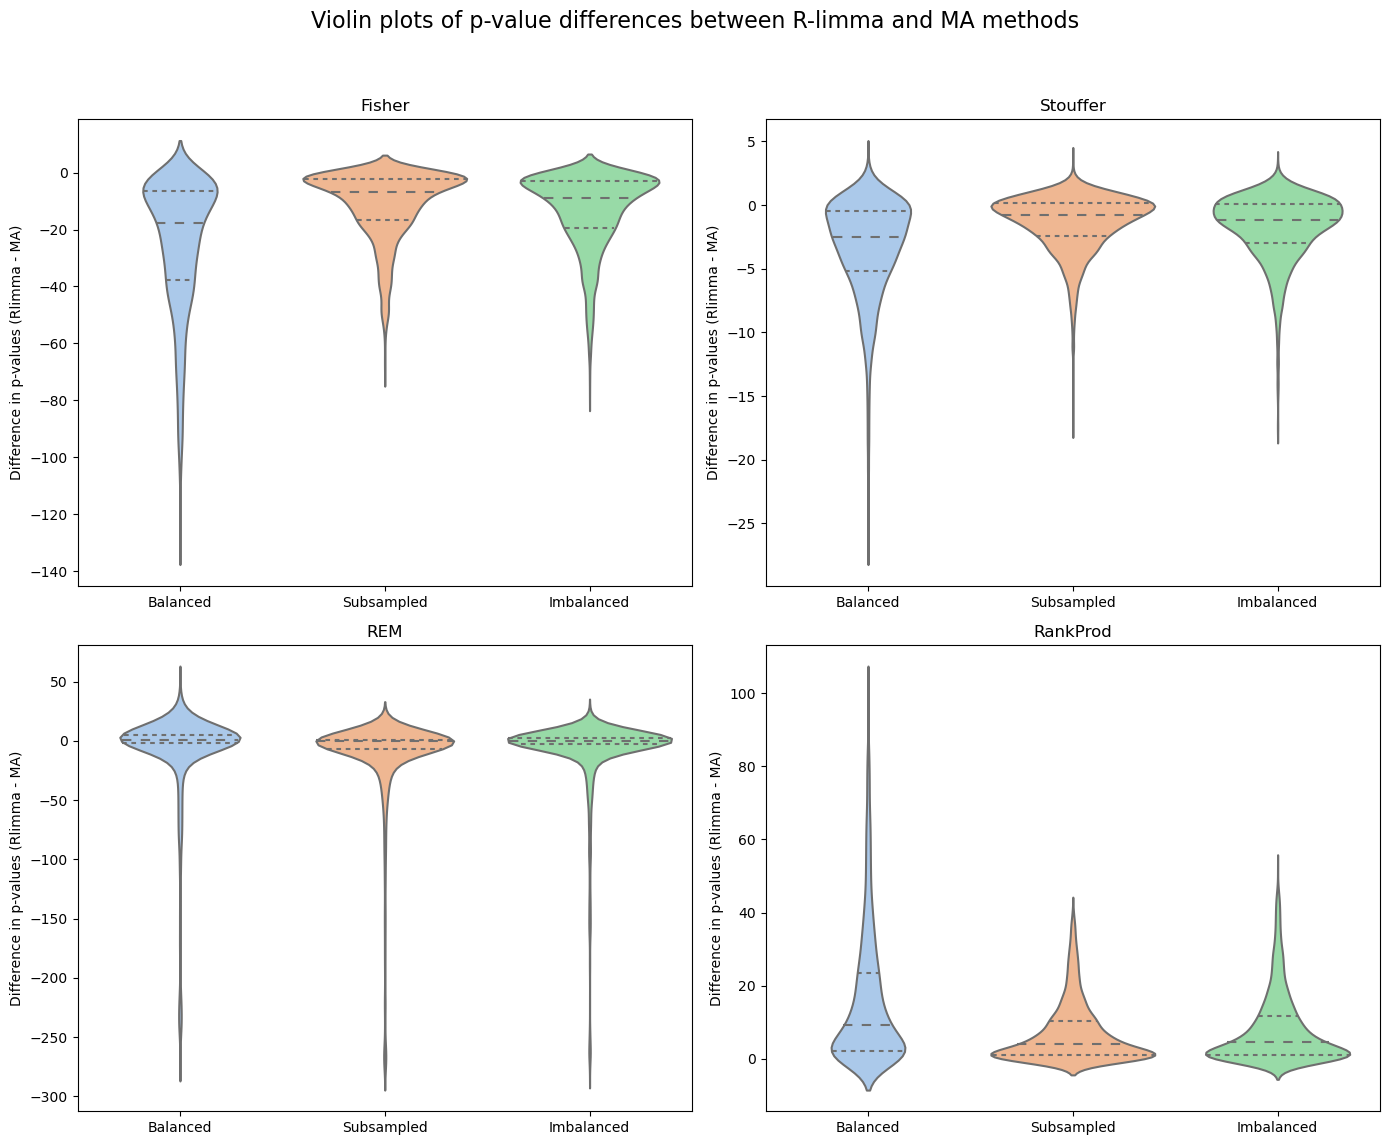

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate differences
diff_data = []
MA_methods = ["Fisher","Stouffer","REM","RankProd"]

for dataset in dfs:
    for MA_method in MA_methods:
        diff_pval = dfs[dataset]['pv_Rlimma'] - dfs[dataset][f'pv_{MA_method}']
        for diff in diff_pval:
            diff_data.append({"Dataset": dataset, "Method": MA_method, "Difference": diff})

# Convert to DataFrame for plotting
diff_df = pd.DataFrame(diff_data)

# Plot
# # Plot without the split option
# plt.figure(figsize=(15, 8))
# sns.violinplot(x="Dataset", y="Difference", hue="Method", data=diff_df, inner="quartile", palette="muted")
# plt.title("Violin plot of p-value differences between Rlimma and MA methods")
# plt.ylabel("Difference in p-values (Rlimma - MA)")
# plt.legend(loc='upper right')
# plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.suptitle("Violin plots of p-value differences between R-limma and MA methods", fontsize=16)

for ax, MA_method in zip(axes.ravel(), MA_methods):
    sns.violinplot(x="Dataset", y="Difference", 
                   data=diff_df[diff_df["Method"] == MA_method], 
                   ax=ax, inner="quartile", palette="pastel")
    ax.set_title(MA_method)
    ax.set_ylabel("Difference in p-values (Rlimma - MA)")
    ax.set_xlabel("")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [39]:
def calculate_differences(dfs):
    methods = ["FedProt","Fisher","Stouffer","REM","RankProd"]
    results = {}
    
    for dataset in dfs:
        results[dataset] = {}
        
        for method in methods:
            results[dataset][method] = {}
            
            # Calculate differences for p-value (ρ)
            diff_pvalue = dfs[dataset]['pv_Rlimma'] - dfs[dataset]['pv_' + method]
            results[dataset][method]['p-value difference'] = {
                #'min': np.min(np.abs(diff_pvalue)),
                'mean': np.mean(np.abs(diff_pvalue)),
                #'max': np.max(np.abs(diff_pvalue))
            }
            
            # Calculate differences for logFC (RMSE & r)
            diff_logFC = dfs[dataset]['lfc_Rlimma'] - dfs[dataset]['lfc_' + method]
            results[dataset][method]['logFC difference'] = {
                #'min': np.min(np.abs(diff_logFC)),
                'mean': np.mean(np.abs(diff_logFC)),
                #'max': np.max(np.abs(diff_logFC))
            }
            
    # Convert the results into the desired DataFrame format
    dfs_out = {}
    for dataset, methods_data in results.items():
        data = {}
        for method, metrics_data in methods_data.items():
            for metric, values in metrics_data.items():
                for stat, value in values.items():
                    col_name = (metric, stat)
                    if col_name not in data:
                        data[col_name] = {}
                    data[col_name][method] = value
        dfs_out[dataset] = pd.DataFrame(data)

    # Concatenate the dataframes for each dataset side by side
    df = pd.concat(dfs_out, axis=1)
    
    return df


calculate_differences(dfs)

Balanced                          Subsampled  \
         p-value difference logFC difference p-value difference   
                       mean             mean               mean   
FedProt        7.886997e-13     1.740385e-14       5.510080e-13   
Fisher         2.516278e+01     3.008852e-03       1.131487e+01   
Stouffer       3.618320e+00     3.008852e-03       1.759376e+00   
REM            1.775865e+01     1.695829e-02       1.472394e+01   
RankProd       1.594684e+01     3.008852e-03       7.082547e+00   

                                  Imbalanced                   
         logFC difference p-value difference logFC difference  
                     mean               mean             mean  
FedProt      2.431069e-14       5.139940e-13     2.054257e-14  
Fisher       1.714867e-03       1.334462e+01     1.118329e-02  
Stouffer     1.714867e-03       2.137555e+00     1.118329e-02  
REM          3.307670e-02       1.187949e+01     3.416127e-02  
RankProd     1.714867e-03       8.121806e+00     1.118329e-02

In [40]:
# from scipy import stats

# def calculate_differences_CI(dfs):
#     methods = ["FedProt", "Fisher", "Stouffer", "REM", "RankProd"]
#     results = {}
    
#     for dataset in dfs:
#         results[dataset] = {}
        
#         for method in methods:
#             results[dataset][method] = {}
            
#             # Calculate differences for p-value (ρ)
#             diff_pvalue = dfs[dataset]['pv_Rlimma'] - dfs[dataset]['pv_' + method]
#             abs_diff_pvalue = np.abs(diff_pvalue)
#             mean_diff_pvalue = np.mean(abs_diff_pvalue)
#             stderr_diff_pvalue = stats.sem(abs_diff_pvalue)
#             ci_diff_pvalue = stderr_diff_pvalue * stats.t.ppf((1 + 0.95) / 2., len(abs_diff_pvalue)-1)
#             results[dataset][method]['p-value difference'] = {
#                 'mean': mean_diff_pvalue,
#                 'CI lower': mean_diff_pvalue - ci_diff_pvalue,
#                 'CI upper': mean_diff_pvalue + ci_diff_pvalue
#             }
            
#             # Calculate differences for logFC (RMSE & r)
#             diff_logFC = dfs[dataset]['lfc_Rlimma'] - dfs[dataset]['lfc_' + method]
#             abs_diff_logFC = np.abs(diff_logFC)
#             mean_diff_logFC = np.mean(abs_diff_logFC)
#             stderr_diff_logFC = stats.sem(abs_diff_logFC)
#             ci_diff_logFC = stderr_diff_logFC * stats.t.ppf((1 + 0.95) / 2., len(abs_diff_logFC)-1)
#             results[dataset][method]['logFC difference'] = {
#                 'mean': mean_diff_logFC,
#                 'CI lower': mean_diff_logFC - ci_diff_logFC,
#                 'CI upper': mean_diff_logFC + ci_diff_logFC
#             }
            
#     # Convert the results into the desired DataFrame format
#     dfs_out = {}
#     for dataset, methods_data in results.items():
#         data = {}
#         for method, metrics_data in methods_data.items():
#             for metric, values in metrics_data.items():
#                 for stat, value in values.items():
#                     col_name = (metric, stat)
#                     if col_name not in data:
#                         data[col_name] = {}
#                     data[col_name][method] = value
#         dfs_out[dataset] = pd.DataFrame(data)

#     # Concatenate the dataframes for each dataset side by side
#     df = pd.concat(dfs_out, axis=1)
    
#     return df

# calculate_differences_CI(dfs)

In [41]:
# def plt_results(dfs, methods = ["FedProt","Fisher","Stouffer","REM","RankProd"],
#                 # colors = ["red","blue","cyan","lightgreen","grey"], 
#                 colors = ["D44500","2E5EAA","FFFB0A","47A025","010B13"], 
#                 what="pv_", suptitle="$-log_{10}(adj.p-values)$", text="",dotsize=1):

#     fig, axes = plt.subplots(1, 2, figsize=(13,5), sharey=False)
#     #fig.suptitle(suptitle,fontsize=16)
#     i=0
#     se = 0
#     results = {}
    
#     for k in ["Balanced", "Imbalanced"]:  # ,"Mild Imbalance","Strong Imbalance"
#         df = dfs[k]
#         axes[i].set_title(k,fontsize=16)
#         rmse = {}
        
#         for j in range(len(methods)):
#             method = methods[j]
#             col = colors[j]
#             x = df[what+"Rlimma"].values
#             y = df[what+method].values
#             rmse[method] = np.sqrt(np.sum((x-y)**2)/len(x))
#             axes[i].scatter(x = x,
#                             y= y,s=dotsize, color=col,alpha=0.5)
            
#         axes[i].set_xlabel('centralized analysis on complete dataset',fontsize=14)
#         axes[i].set_ylabel('other methods',fontsize=14)
#         axes[i].plot([np.min(df.values), np.max(df.values)+5], [np.min(df.values), np.max(df.values)+5],
#                    color = "red",ls="--",lw=0.5)

#         corrs = df[[what+"Rlimma"]+[what+m for m in methods]].corr().loc[[what+"Rlimma"],]
#         corrs.rename(lambda x: x.replace(what,""), axis="columns",inplace = True)
#         corrs = corrs.T.to_dict()[what+'Rlimma']
#         rank_corrs = df[[what+"Rlimma"]+[what+m for m in methods]].corr(method="spearman").loc[[what+"Rlimma"],]
#         rank_corrs.rename(lambda x: x.replace(what,""), axis="columns",inplace = True)
#         rank_corrs = rank_corrs.T.to_dict()[what+'Rlimma']
#         patches = {}

#         for j in range(len(methods)):
#             method = methods[j]
#             col = colors[j]
#             r = corrs[method]
#             rho = rank_corrs[method]
#             err = rmse[method]
#             if err <0.01 or err>100:
#                 err = "{:.2e}".format(err)
#             else:
#                 err = round(err,2)
#             patch = mpatches.Patch(color=col, label='%s: r=%s; ρ=%s; RMSE=%s'%(method, round(r,2),round(rho,2),err))
#             patches[method] = patch 

#         axes[i].legend(handles=[patches[m] for m in methods],loc='upper left', fontsize=12)
#         i+=1
#         results[(k,"r")] = corrs
#         results[(k,"ρ")] = rank_corrs
#         results[(k,"RMSE")] = pd.Series(rmse)


#     axes[0].set_xlim([-5, 120])  # To set the x-axis limit to [0,180]
#     axes[1].set_xlim([-5, 120])  # To set the x-axis limit to [0,180]

#     results = pd.DataFrame.from_dict(results)

#     # axes[i].set_ylim([0, 300])  # To set the y-axis limit to [0,300]
#     if text:
#         tmp = axes[0].text(-0.2*np.max(df.values), np.max(df.values), text, fontsize=24)
#     return results.loc[methods,]
    

In [42]:
from matplotlib.table import table

def plt_results(dfs, methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
                colors=["D44500","2E5EAA","FFFB0A","47A025","010B13"], 
                what="pv_", suptitle="$-log_{10}(adj.p-values)$", text="",dotsize=1):
    fig, axes = plt.subplots(1, 2, figsize=(10,4.5), sharey=False)
    i=0
    se = 0
    results = {}

    for k in ["Balanced", "Imbalanced"]:
        df = dfs[k]
        axes[i].set_title(k,fontsize=16)
        rmse = {}
        
        for j in range(len(methods)):
            method = methods[j]
            col = colors[j]
            x = df[what+"Rlimma"].values
            y = df[what+method].values
            rmse[method] = np.sqrt(np.sum((x-y)**2)/len(x))
            axes[i].scatter(x = x, y= y,s=dotsize, color=col,alpha=0.5)
        
        axes[i].set_xlabel('centralized analysis on complete dataset',fontsize=14)
        axes[i].set_ylabel('other methods',fontsize=14)
        axes[i].plot([np.min(df.values), np.max(df.values)+5], [np.min(df.values), np.max(df.values)+5],
                   color = "red",ls="--",lw=0.5)
     
        corrs = df[[what+"Rlimma"]+[what+m for m in methods]].corr().loc[[what+"Rlimma"],]
        corrs.rename(lambda x: x.replace(what,""), axis="columns",inplace = True)
        corrs = corrs.T.to_dict()[what+'Rlimma']
        rank_corrs = df[[what+"Rlimma"]+[what+m for m in methods]].corr(method="spearman").loc[[what+"Rlimma"],]
        rank_corrs.rename(lambda x: x.replace(what,""), axis="columns",inplace = True)
        rank_corrs = rank_corrs.T.to_dict()[what+'Rlimma']
        patches = {}

        # Prepare data for table
        data = {}
        for j, method in enumerate(methods):
            if method == "FedProt":
                data[method] = [f"{round(corrs[method],2)}", f"{round(rank_corrs[method],2)}", f"{rmse[method]:.0e}"]
            else:
                data[method] = [f"{round(corrs[method],2)}", f"{round(rank_corrs[method],2)}", f"{round(rmse[method],2)}"]

        # Create table for each axes
        colLabels = ["r", "ρ", "RMSE"]
        the_table = table(axes[i], cellText=list(data.values()),
                        colLabels=colLabels,
                        rowLabels=list(data.keys()),
                        cellLoc = 'center', rowLoc = 'right',
                        bbox=[0.5, 0.66, 0.5, 0.34],  
                        cellColours=[['white'] * len(colLabels) for col in colors]
                        )

        # Set font size for the entire table
        the_table.auto_set_font_size(False)
        the_table.set_fontsize(10)  # Change this value as required

        for j, label in enumerate(data.keys()):
            cell = the_table.get_celld()[(j + 1, -1)]  # get the row label cell
            cell.set_facecolor(colors[j])  # set the row label background color
            if label == "FedProt" or label == "RankProd":
                cell.get_text().set_color('white')  # set the row label text color 
            else:
                cell.get_text().set_color('black')
        i += 1
        results[(k,"r")] = corrs
        results[(k,"ρ")] = rank_corrs
        results[(k,"RMSE")] = pd.Series(rmse)


    axes[0].set_xlim([-5, 120])
    axes[1].set_xlim([-5, 120])
    
    results = pd.DataFrame.from_dict(results)
    
    if text:
        tmp = axes[0].text(-0.2*np.max(df.values), np.max(df.values), text, fontsize=24)
        
    plt.tight_layout()
    return results.loc[methods,]

Balanced                         Imbalanced                        
                 r         ρ          RMSE          r         ρ          RMSE
FedProt   1.000000  1.000000  1.117098e-12   1.000000  1.000000  7.113134e-13
Fisher    0.979809  0.952473  3.443734e+01   0.974095  0.930525  1.893044e+01
Stouffer  0.986827  0.961476  5.105709e+00   0.980550  0.932268  3.106818e+00
REM       0.793242  0.913633  4.626417e+01   0.760068  0.905647  3.636590e+01
RankProd  0.772213  0.880505  2.433440e+01   0.774668  0.856538  1.254560e+01

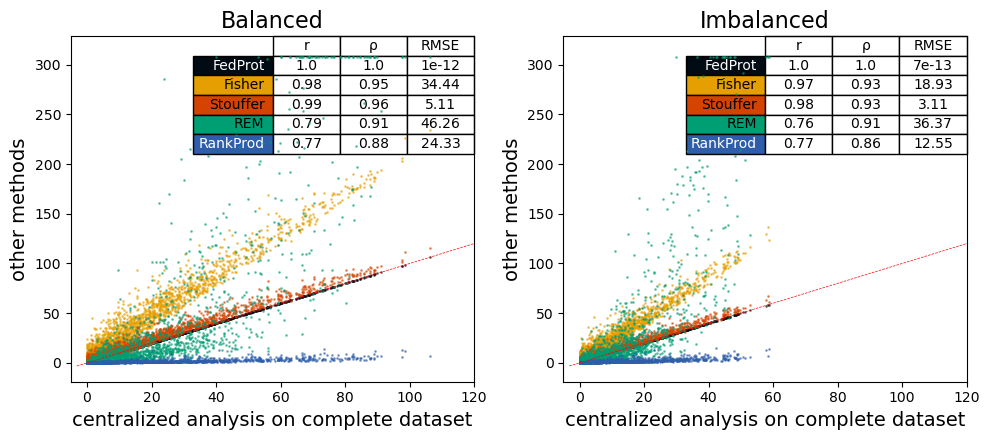

In [43]:
# colors = ['#010B13', '#E69F00', '#CC79A7', '#009E73', '#56B4E9']
colors = ["#010B13","#E69F00","#D44400","#009E73","#2E5EAA"]
#colors = ["#010B13","#D44500","#FFFB0A","#009E73","#2E5EAA"]


corrs = plt_results(dfs, text = "", colors = colors)
plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)
corrs

## Stats

In [44]:
def calc_stats(df,lfc_thr=1,adj_pval_thr = -np.log10(0.05),
               stats=["TP","TN","FP","FN","Precision","Recall","F1","r","ρ","RMSE"],
               methods=["FedProt","Fisher","Stouffer","REM","RankProd"],top_genes=-1):
    results={}
    all_genes = set(df.index.values)

    if top_genes<=0:
        top_genes = df.shape[0]
    #de = df.sort_values(by="pv_Rlimma",ascending = False)
    de = df.loc[df["pv_Rlimma"]>adj_pval_thr,:]
    de = de.loc[np.abs(de["lfc_Rlimma"])>=lfc_thr,:].head(top_genes)
    
    # truth: DE and not DE genes predicted by limma
    T = set(de.index.values)
    F = all_genes.difference(T)
    #prnt("T:",len(T), "F:",len(F))
    if len(set(stats).intersection(set(["TP","TN","FP","FN","Precision","Recall","F1"])))>0:
        for m in methods:
            # prediction
            de2 = df.loc[:,["pv_"+m,"lfc_"+m]].sort_values(by="pv_"+m,ascending = False)
            de2 = de2.loc[de2["pv_"+m]>adj_pval_thr,:]
            de2 = de2.loc[np.abs(de2["lfc_"+m])>=lfc_thr,:].head(top_genes)
            P = set(de2.index.values)
            N = all_genes.difference(P)
            
            TP=len(T.intersection(P))
            FP = len(F.intersection(P))
            TN = len(F.intersection(N))
            FN = len(T.intersection(N))
            if (TP+FP)>0:
                Prec = TP*1.0/(TP+FP)
            else:
                Prec =0
            if (TP+FN) >0:
                Rec = TP*1.0/(TP+FN)
            else:
                Rec = 0
            if Prec and Rec:
                F1 = 2* (Prec*Rec)/(Prec+Rec)
            else:
                F1=0

            results[m] = {"TP":TP,"FP":FP,
                            "TN":TN,"FN":FN,
                             "Precision":Prec,"Recall":Rec, "F1":F1}

    # correlation of all p-values
    if "RMSE" in stats:
        for m in methods:
            # RMSE for -log10 p-values
            df = df.sort_values(by="pv_Rlimma",ascending = False).head(top_genes)
            x = df["pv_Rlimma"].values
            y = df["pv_"+m].values
            rmse = np.sqrt(np.sum((x-y)**2)/len(x))
            if m in results.keys():
                results[m]["RMSE"] = rmse
            else:
                results[m] = {"RMSE":rmse}
    # turn results to df if it is not empty
    if len(results.keys())>0:
        results = pd.DataFrame.from_dict(results).T
    if "r" in stats:
        df = df.sort_values(by="pv_Rlimma",ascending = False).head(top_genes)
        corrs = df[["pv_"+"Rlimma"]+["pv_"+m for m in methods]].corr().loc[["pv_"+"Rlimma"],]
        corrs.rename(lambda x: x.replace("pv_",""), axis="columns",inplace = True)
        corrs = corrs.loc[:,methods]
        corrs = corrs.T['pv_Rlimma']
        results["r"] = corrs
    if "ρ" in stats: 
        df = df.sort_values(by="pv_Rlimma",ascending = False).head(top_genes)
        rank_corrs = df[["pv_"+"Rlimma"]+["pv_"+m for m in methods]].corr(method="spearman").loc[["pv_"+"Rlimma"],]
        rank_corrs.rename(lambda x: x.replace("pv_",""), axis="columns",inplace = True)
        rank_corrs = rank_corrs.loc[:,methods]
        rank_corrs = rank_corrs.T['pv_Rlimma']
        results["ρ"] = rank_corrs
    
    # turn results to df if it is still a dict
    if type(results)==dict:
        results = pd.DataFrame.from_dict(results)
    return results.loc[:,stats]

In [45]:
stats = {}
stats2  = {}

for m in ["RMSE", "Precision","Recall"]:
    for ds in ["Balanced", 'Subsampled', 'Imbalanced']:  # ,"Mild Imbalance","Strong Imbalance"
        df = dfs[ds].sort_values(by="pv_Rlimma",ascending = False)
        results = calc_stats(df,lfc_thr=1,adj_pval_thr = -np.log10(0.05),
                                                        methods=["FedProt","Fisher","Stouffer","REM","RankProd"])
        stats[(m,ds)] = results[m]
    #print(confusion_matrix)
pd.DataFrame.from_dict(stats)

RMSE                             Precision             \
              Balanced    Subsampled    Imbalanced  Balanced Subsampled   
FedProt   1.117098e-12  6.888925e-13  7.113134e-13   1.00000   1.000000   
Fisher    3.443734e+01  1.661965e+01  1.893044e+01   1.00000   0.996324   
Stouffer  5.105709e+00  2.590823e+00  3.106818e+00   1.00000   0.996324   
REM       4.626417e+01  4.413910e+01  3.636590e+01   0.98917   0.970696   
RankProd  2.433440e+01  1.084285e+01  1.254560e+01   1.00000   0.996324   

                       Recall                        
         Imbalanced  Balanced Subsampled Imbalanced  
FedProt    1.000000  1.000000   1.000000   1.000000  
Fisher     0.979021  0.992857   0.992674   0.996441  
Stouffer   0.979021  0.992857   0.992674   0.996441  
REM        0.982079  0.978571   0.970696   0.975089  
RankProd   0.979021  0.992857   0.992674   0.996441

In [48]:
stats = {}
stats2  = {}

for m in ["FP","FN","F1"]:
    for ds in ["Balanced", 'Subsampled', 'Imbalanced']:  # ,"Mild Imbalance","Strong Imbalance"
        df = dfs[ds].sort_values(by="pv_Rlimma",ascending = False)
        results = calc_stats(df,lfc_thr=1,adj_pval_thr = -np.log10(0.05),
                                                        methods=["FedProt","Fisher","Stouffer","REM","RankProd"])
        stats[(m,ds)] = results[m]
    #print(confusion_matrix)
pd.DataFrame.from_dict(stats)

FP                             FN                        \
         Balanced Subsampled Imbalanced Balanced Subsampled Imbalanced   
FedProt       0.0        0.0        0.0      0.0        0.0        0.0   
Fisher        0.0        1.0        6.0      2.0        2.0        1.0   
Stouffer      0.0        1.0        6.0      2.0        2.0        1.0   
REM           3.0        8.0        5.0      6.0        8.0        7.0   
RankProd      0.0        1.0        6.0      2.0        2.0        1.0   

                F1                        
          Balanced Subsampled Imbalanced  
FedProt   1.000000   1.000000   1.000000  
Fisher    0.996416   0.994495   0.987654  
Stouffer  0.996416   0.994495   0.987654  
REM       0.983842   0.970696   0.978571  
RankProd  0.996416   0.994495   0.987654

In [45]:
def find_diff(dfs):
    stats = {}
    for ds in dfs.keys():
        df = dfs[ds]
        diff = np.abs(df["pv_Rlimma"] - df["pv_FedProt"] )
        
        stats[ds] ={ ("-log10(p-value)","min") : np.min(diff),
                    ("-log10(p-value)","mean"):np.mean(diff),
                    ("-log10(p-value)","max"):np.max(diff)}
        #print(ds, np.mean(diff))
        diff = np.abs(df["lfc_Rlimma"] - df["lfc_FedProt"] )
        stats[ds].update({ ("log2(FC)","min") : np.min(diff),
                    ("log2(FC)","mean"):np.mean(diff),
                    ("log2(FC)","max"):np.max(diff)})
    return pd.DataFrame.from_dict(stats).T

In [46]:
stats2 = find_diff(dfs)
stats2 = stats2.loc[["Balanced", 'Imbalanced'],:]  # ,"Mild Imbalance","Strong Imbalance"
stats2.style.format("{:.2e}")  

# Fig 4

In [47]:
from matplotlib.colors import ListedColormap as lcmap

cmap = lcmap(["blue","skyblue","red"], name='from_list', N=None)

In [48]:
def plot_stats_for_topN(dfs,
                        datasets = ["Balance","Mild Imbalance","Strong Imbalance"],
                        metrics=["F1"],
                        methods = ["FedProt","Fisher","Stouffer","REM","RankProd"],
                        colors = ["red","blue","cyan","lightgreen","grey"],
                        min_n_genes=10,max_n_genes = 1000,step=10, text="",log=False,figfile= "",suptitle=""):
    
    """Calculated and plots statisctics for top N genes ordered by p-value. 
   Top genes are chosen based on a sliding threshold, starting from 'min_n_genes' and moving to 'max_n_genes' with 'step'."""
    cmap = lcmap(colors, name='from_list', N=None)
    fig, all_axes = plt.subplots(len(metrics), len(datasets), figsize=(13,5*len(metrics)), sharey=False)
    all_stats ={}
    for k in range(len(metrics)):
        metric = metrics[k]
        all_stats[metric]={}
        if len(metrics)==1:
            axes = all_axes
        else:
            axes = all_axes[k]
        for i in range(len(datasets)):
            ds = datasets[i]
            df = dfs[ds]
            df = df.sort_values(by="pv_Rlimma",ascending = False)
            n_genes = df.shape[0]
            stats  = {}
            top_n_genes = np.arange(min_n_genes,max_n_genes,step)
            for j in range(len(top_n_genes)): #
                confusion_matrix = calc_stats(df,lfc_thr=1.0,adj_pval_thr = -np.log10(0.05),stats=[metric],
                                                         methods=methods,top_genes=top_n_genes[j])
                stats[top_n_genes[j]] = confusion_matrix[metric]
            stats = pd.DataFrame.from_dict(stats)
            tmp = stats.T.plot(ax =  axes[i],cmap = cmap)
            if log:
                axes[i].set_yscale('log')
            #print(stats)
            if k==len(metrics)-1:
                tmp = axes[i].set_xlabel("number of top-ranked proteins",fontsize=14)
            if i ==0:
                if log:
                    tmp = axes[i].set_ylabel("$log_{10}($"+metric+"$)$",fontsize=24)
                else:
                    tmp = axes[i].set_ylabel(metric,fontsize=18)
                if text:
                    tmp = axes[0].text(-0.15*max_n_genes, np.max(stats.values)*1.0, text, fontsize=24)
            if i >0 or k!=len(metrics)-1:
                axes[i].get_legend().remove()
            if k==0:
                tmp = axes[i].set_title(ds,fontsize=20)
            all_stats[metric][ds] = stats
    if suptitle:
        fig.suptitle(suptitle,fontsize=24)
    if figfile:
        fig.savefig(figfile)
    return all_stats


In [49]:
min(len(dfs['Balanced'].loc[(dfs['Balanced']['pv_Rlimma'] > -np.log10(0.05)) & (dfs['Balanced']['lfc_Rlimma'] > 1.0),:].index.values),
    len(dfs['Imbalanced'].loc[(dfs['Imbalanced']['pv_Rlimma'] > -np.log10(0.05)) & (dfs['Imbalanced']['lfc_Rlimma'] > 1.0),:].index.values))

208

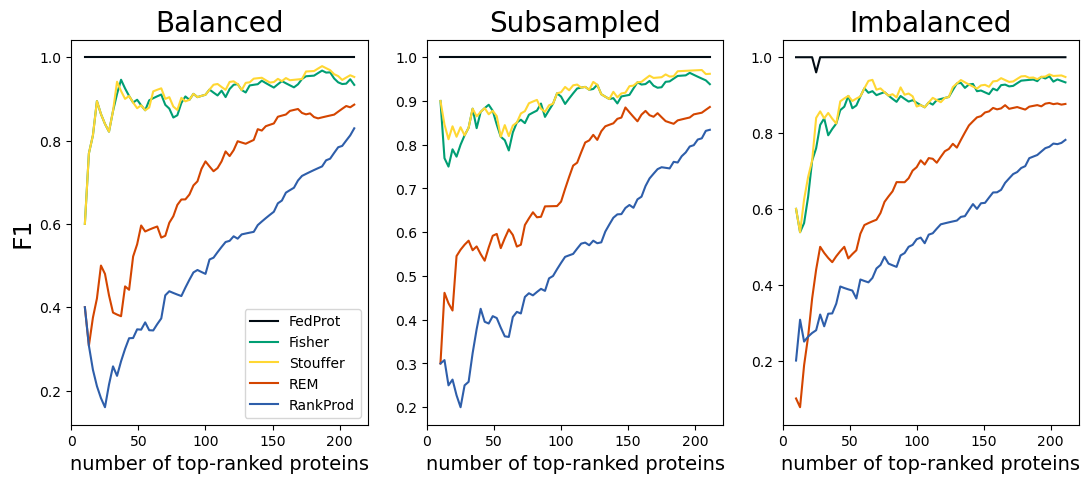

In [50]:
n_DE_genes = round(max(len(dfs['Balanced'].loc[(dfs['Balanced']['pv_Rlimma'] > -np.log10(0.05)) & (dfs['Balanced']['lfc_Rlimma'] > 1.0),:].index.values),
    len(dfs['Imbalanced'].loc[(dfs['Imbalanced']['pv_Rlimma'] > -np.log10(0.05)) & (dfs['Imbalanced']['lfc_Rlimma'] > 1.0),:].index.values)) / 10) * 10

# colors = ['black', '#33FF57', '#5733FF', '#FF33D4', '#FFD733']
# colors = ['#010B13', '#D44500', '#FFFB0A', '#009E73', '#2E5EAA']
colors = ['#010B13', '#009E73', '#FFD733', '#D44500', '#2E5EAA']

min_n_genes = 10
step = 3
max_n_genes = n_DE_genes + step

data = plot_stats_for_topN(dfs,
                           datasets = ["Balanced", 'Subsampled', 'Imbalanced'], #,"Mild Imbalance","Strong Imbalance"
                           metrics=["F1"],
                           min_n_genes=min_n_genes,
                           max_n_genes = max_n_genes,
                           step=step,
                           colors=colors)

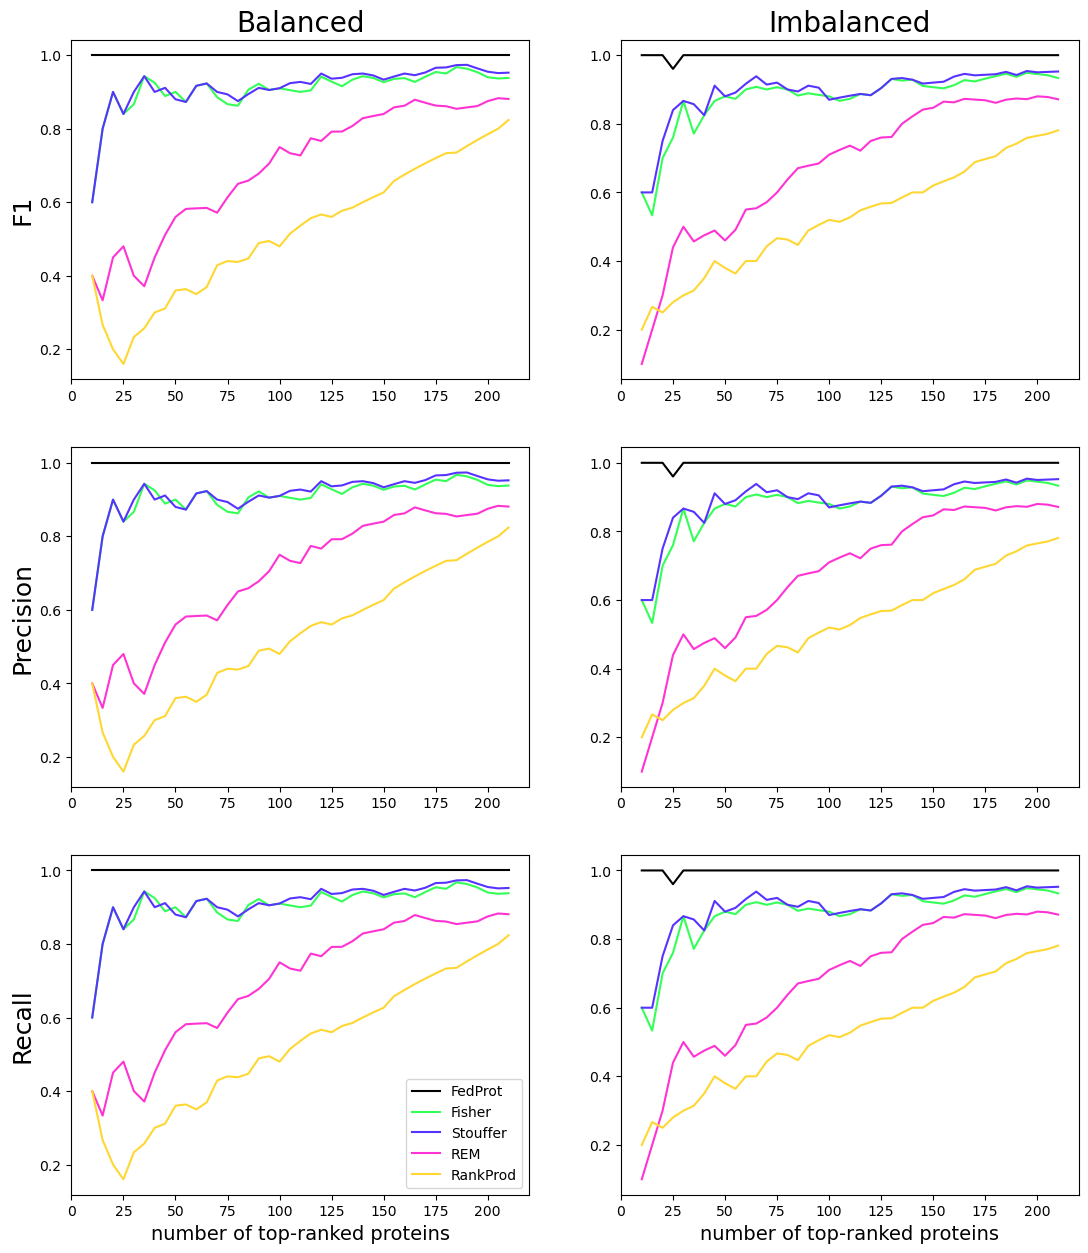

In [51]:
n_DE_genes = min(len(dfs['Balanced'].loc[(dfs['Balanced']['pv_Rlimma'] > -np.log10(0.05)) & (dfs['Balanced']['lfc_Rlimma'] > 1.0),:].index.values),
    len(dfs['Imbalanced'].loc[(dfs['Imbalanced']['pv_Rlimma'] > -np.log10(0.05)) & (dfs['Imbalanced']['lfc_Rlimma'] > 1.0),:].index.values))

colors = ['black', '#33FF57', '#5733FF', '#FF33D4', '#FFD733']


min_n_genes = 10
step = 5
max_n_genes = n_DE_genes + step

data = plot_stats_for_topN(dfs,
                           datasets = ["Balanced", 'Imbalanced'], #,"Mild Imbalance","Strong Imbalance"
                           metrics=["F1","Precision","Recall"],
                           min_n_genes=min_n_genes,
                           max_n_genes = max_n_genes,
                           step=step,
                           colors=colors)

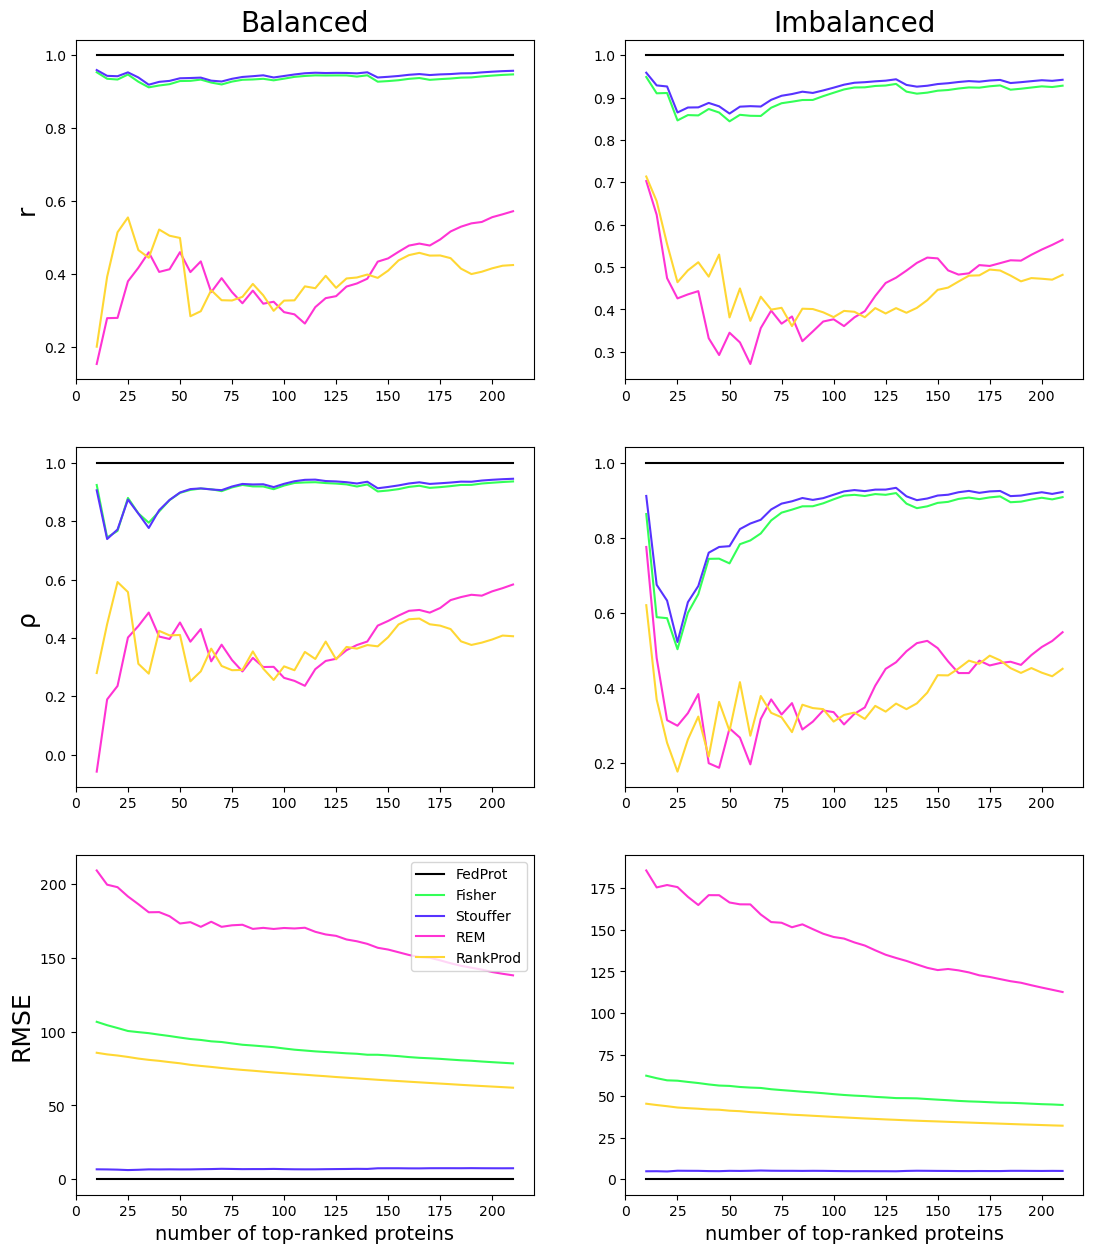

In [52]:
data = plot_stats_for_topN(dfs,
                           datasets = ["Balanced", 'Imbalanced'], #,"Mild Imbalance","Strong Imbalance"
                           metrics=["r","ρ","RMSE"],
                           min_n_genes=min_n_genes,
                           max_n_genes = max_n_genes, 
                           step=step,colors=colors,
                           #suptitle = "GTEx skin: sun-exposed vs not exposed",
                           #figfile="../../paper_v1/Supplementary/FigS3_RMSE_corr_GTEx.png"
                           )

In [53]:
lfc_thr =1.0
adj_pv_thr = 0.05
table = pd.read_csv("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/balanced/result_deqms_cov.tsv",sep = "\t")
d = table.loc[:,["adj.P.Val","logFC"]]
d = d.loc[d["adj.P.Val"] < adj_pv_thr,:]

print("DE based on p-val threhold:")


d_up = d.loc[d["logFC"] >0,:]
d_down = d.loc[d["logFC"] <0,:]
print("\t","upreg:",d_up.shape[0], "downreg:",d_down.shape[0], "total DE:", d_up.shape[0]+d_down.shape[0])
d_up = d.loc[d["logFC"] >=lfc_thr,:]
d_down = d.loc[d["logFC"] <=-lfc_thr,:]
n_DE_genes =  d_up.shape[0]+d_down.shape[0]

print("DE based on p-val and log2FC threholds:")
print("\t","upreg:",d_up.shape[0], "downreg:",d_down.shape[0], "total DE:",n_DE_genes)


DE based on p-val threhold:
	 upreg: 1013 downreg: 868 total DE: 1881
DE based on p-val and log2FC threholds:
	 upreg: 208 downreg: 72 total DE: 280


### ratios

In [54]:
def calc_stats_new(df,lfc_thr=1,adj_pval_thr = -np.log10(0.05),
               stats=["TP","TN","FP","FN","Precision","Recall","F1","r","ρ","RMSE"],
               methods=["FedProt","Fisher","Stouffer","REM","RankProd"],top_genes=-1):
    results={}
    all_genes = set(df.index.values)

    if top_genes<=0:
        top_genes = df.shape[0]
    #de = df.sort_values(by="pv_Rlimma",ascending = False)
    de = df.loc[df["pv_Rlimma"]>adj_pval_thr,:]
    de = de.loc[np.abs(de["lfc_Rlimma"])>=lfc_thr,:].head(top_genes)
    
    # truth: DE and not DE genes predicted by limma
    T = set(de.index.values)
    F = all_genes.difference(T)
    #prnt("T:",len(T), "F:",len(F))
    if len(set(stats).intersection(set(["TP","TN","FP","FN","Precision","Recall","F1"])))>0:
        for m in methods:
            # prediction
            de2 = df.loc[:,["pv_"+m,"lfc_"+m]].sort_values(by="lfc_"+m,ascending = False)
            de2 = de2.loc[de2["pv_"+m]>adj_pval_thr,:]
            de2 = de2.loc[np.abs(de2["lfc_"+m])>=lfc_thr,:].head(top_genes)
            P = set(de2.index.values)
            N = all_genes.difference(P)
            
            TP=len(T.intersection(P))
            FP = len(F.intersection(P))
            TN = len(F.intersection(N))
            FN = len(T.intersection(N))
            if (TP+FP)>0:
                Prec = TP*1.0/(TP+FP)
            else:
                Prec =0
            if (TP+FN) >0:
                Rec = TP*1.0/(TP+FN)
            else:
                Rec = 0
            if Prec and Rec:
                F1 = 2* (Prec*Rec)/(Prec+Rec)
            else:
                F1=0

            results[m] = {"TP":TP,"FP":FP,
                            "TN":TN,"FN":FN,
                             "Precision":Prec,"Recall":Rec, "F1":F1}

    # turn results to df if it is not empty
    if len(results.keys())>0:
        results = pd.DataFrame.from_dict(results).T
    # turn results to df if it is still a dict
    if type(results)==dict:
        results = pd.DataFrame.from_dict(results)
    return results.loc[:,stats]

In [55]:
def plot_stats_for_topN_new(dfs,
                        datasets = ["Balance","Mild Imbalance","Strong Imbalance"],
                        metrics=["F1"],
                        methods = ["FedProt","Fisher","Stouffer","REM","RankProd"],
                        colors = ["red","blue","cyan","lightgreen","grey"],
                        min_n_genes=10,max_n_genes = 1000,step=10, text="",log=False,figfile= "",suptitle=""):
    
    """Calculated and plots statisctics for top N genes ordered by p-value. 
   Top genes are chosen based on a sliding threshold, starting from 'min_n_genes' and moving to 'max_n_genes' with 'step'."""
    cmap = lcmap(colors, name='from_list', N=None)
    fig, all_axes = plt.subplots(len(metrics), len(datasets), figsize=(13,5*len(metrics)), sharey=False)
    all_stats ={}
    for k in range(len(metrics)):
        metric = metrics[k]
        all_stats[metric]={}
        if len(metrics)==1:
            axes = all_axes
        else:
            axes = all_axes[k]
        for i in range(len(datasets)):
            ds = datasets[i]
            df = dfs[ds]
            df = df.sort_values(by="lfc_Rlimma",ascending = False)
            stats  = {}
            top_n_genes = np.arange(min_n_genes,max_n_genes,step)
            for j in range(len(top_n_genes)): #
                confusion_matrix = calc_stats_new(df,lfc_thr=1.0,adj_pval_thr = -np.log10(0.05),stats=[metric],
                                                         methods=methods,top_genes=top_n_genes[j])
                stats[top_n_genes[j]] = confusion_matrix[metric]
            stats = pd.DataFrame.from_dict(stats)
            tmp = stats.T.plot(ax =  axes[i],cmap = cmap)
            if log:
                axes[i].set_yscale('log')
            #print(stats)
            if k==len(metrics)-1:
                tmp = axes[i].set_xlabel("number of top-ranked proteins",fontsize=14)
            if i ==0:
                if log:
                    tmp = axes[i].set_ylabel("$log_{10}($"+metric+"$)$",fontsize=24)
                else:
                    tmp = axes[i].set_ylabel(metric,fontsize=18)
                if text:
                    tmp = axes[0].text(-0.15*max_n_genes, np.max(stats.values)*1.0, text, fontsize=24)
            if i >0 or k!=len(metrics)-1:
                axes[i].get_legend().remove()
            if k==0:
                tmp = axes[i].set_title(ds,fontsize=20)
            all_stats[metric][ds] = stats
    if suptitle:
        fig.suptitle(suptitle,fontsize=24)
    if figfile:
        fig.savefig(figfile)
    return all_stats


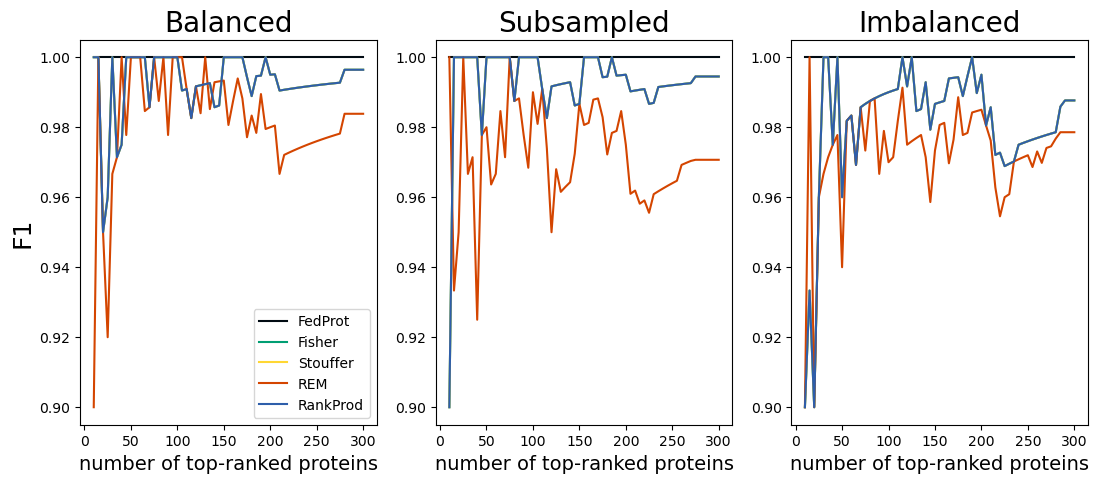

In [56]:
n_DE_genes = round(max(len(dfs['Balanced'].loc[(dfs['Balanced']['pv_Rlimma'] > -np.log10(0.05)) & (dfs['Balanced']['lfc_Rlimma'] > 1.0),:].index.values),
    len(dfs['Imbalanced'].loc[(dfs['Imbalanced']['pv_Rlimma'] > -np.log10(0.05)) & (dfs['Imbalanced']['lfc_Rlimma'] > 1.0),:].index.values)) / 10) * 10

# colors = ['black', '#33FF57', '#5733FF', '#FF33D4', '#FFD733']
# colors = ['#010B13', '#D44500', '#FFFB0A', '#009E73', '#2E5EAA']
colors = ['#010B13', '#009E73', '#FFD733', '#D44500', '#2E5EAA']

min_n_genes = 10
step = 5
n_DE_genes = 300
max_n_genes = n_DE_genes + step

data = plot_stats_for_topN_new(dfs,
                           datasets = ["Balanced", 'Subsampled', 'Imbalanced'], #,"Mild Imbalance","Strong Imbalance"
                           metrics=["F1"],
                           min_n_genes=min_n_genes,
                           max_n_genes = max_n_genes,
                           step=step,
                           colors=colors)

# Sca.P.Val.

In [64]:
def read_results_on_scap(workdir):
    df = {}
    offset = np.finfo(float).tiny # replace zero pvals with this value
    
    rlimma = pd.read_csv(workdir+"/result_deqms_cov.tsv", sep="\t", index_col=0)
    rlimma.loc[rlimma["sca.adj.pval"]==0,"sca.adj.pval"] = offset
    df["pv_Rlimma"] = -np.log10(rlimma["sca.adj.pval"])
    df["lfc_Rlimma"] = rlimma["logFC"]

    # Fisher
    ma_cm = pd.read_csv(workdir+"/MA_CM.tsv", sep="\t")
    ma_cm.index = ma_cm["Symbol"].values
    df["lfc_Fisher"] = ma_cm["metafc"]
    if_passed, adj_pval,alphacSidak,alphacBonf = multipletests(ma_cm["metap"].values, alpha=0.05, method='fdr_bh',
                                           is_sorted=False, returnsorted=False)
    adj_pval[adj_pval==0] = offset
    df["pv_Fisher"] = -np.log10(pd.Series(adj_pval,index=ma_cm["metap"].index))

    # REM
    ma_rem = pd.read_csv(workdir+"/MA_REM.tsv", sep="\t")
    ma_rem.index = ma_rem["Symbol"].values
    df["lfc_REM"] = ma_rem["randomSummary"]
    if_passed, adj_pval, alphacSidak, alphacBonf = multipletests(ma_rem["randomP"].values, alpha=0.05, method='fdr_bh',
                                           is_sorted=False, returnsorted=False)
    adj_pval[adj_pval==0] = offset
    df["pv_REM"] = -np.log10(pd.Series(adj_pval,index=ma_rem["randomP"].index))

    # fedprot
    fedprot = pd.read_csv(workdir+"/results.FedProt.tsv", sep="\t", index_col=0)
    fedprot.loc[fedprot["sca.adj.pval"]==0, "sca.adj.pval"] = offset
    df["pv_FedProt"] = -np.log10(fedprot["sca.adj.pval"])
    df["lfc_FedProt"] = fedprot["logFC"]

    ### Stoufer 
    stoufer  = pd.read_csv(workdir+"/MA_Stouffer.tsv", sep="\t", index_col=0)
    stoufer.loc[stoufer["FDR"]==0,"FDR"] = offset
    df["pv_Stouffer"] = -np.log10(stoufer["FDR"])
    df["lfc_Stouffer"] = df["lfc_Fisher"]  # take logFC from MetaVolcanoR
    ### RankProd
    rankprod  = pd.read_csv(workdir+"/MA_RankProd.tsv", sep="\t", index_col=0)
    rankprod["FDR"] = rankprod.loc[:,["down_reg.FDR","up_reg.FDR"]].min(axis=1)
    rankprod.loc[rankprod["FDR"]==0,"FDR"] = offset
    df["pv_RankProd"] = -np.log10(rankprod["FDR"])
    df["lfc_RankProd"] = rankprod["avgL2FC"] 
    
    df = pd.DataFrame.from_dict(df)
    df = df.dropna(axis=0)
    return df

In [65]:
def read_results_on_scap_not_log(workdir):
    df = {}
    
    rlimma = pd.read_csv(workdir+"/result_deqms_cov.tsv", sep="\t", index_col=0)
    df["pv_Rlimma"] = rlimma["sca.adj.pval"]
    df["lfc_Rlimma"] = rlimma["logFC"]

    # Fisher
    ma_cm = pd.read_csv(workdir+"/MA_CM.tsv", sep="\t")
    ma_cm.index = ma_cm["Symbol"].values
    df["lfc_Fisher"] = ma_cm["metafc"]
    if_passed, adj_pval,alphacSidak,alphacBonf = multipletests(ma_cm["metap"].values, alpha=0.05, method='fdr_bh',
                                           is_sorted=False, returnsorted=False)
    df["pv_Fisher"] = pd.Series(adj_pval,index=ma_cm["metap"].index)

    # REM
    ma_rem = pd.read_csv(workdir+"/MA_REM.tsv", sep="\t")
    ma_rem.index = ma_rem["Symbol"].values
    df["lfc_REM"] = ma_rem["randomSummary"]
    if_passed, adj_pval, alphacSidak, alphacBonf = multipletests(ma_rem["randomP"].values, alpha=0.05, method='fdr_bh',
                                           is_sorted=False, returnsorted=False)
    df["pv_REM"] = pd.Series(adj_pval,index=ma_rem["randomP"].index)

    # fedprot
    fedprot = pd.read_csv(workdir+"/results.FedProt.tsv", sep="\t", index_col=0)
    df["pv_FedProt"] = fedprot["sca.adj.pval"]
    df["lfc_FedProt"] = fedprot["logFC"]

    ### Stoufer 
    stoufer  = pd.read_csv(workdir+"/MA_Stouffer.tsv", sep="\t", index_col=0)
    df["pv_Stouffer"] = stoufer["FDR"]
    df["lfc_Stouffer"] = df["lfc_Fisher"]  # take logFC from MetaVolcanoR
    ### RankProd
    rankprod  = pd.read_csv(workdir+"/MA_RankProd.tsv", sep="\t", index_col=0)
    rankprod["FDR"] = rankprod.loc[:,["down_reg.FDR","up_reg.FDR"]].min(axis=1)
    df["pv_RankProd"] = rankprod["FDR"]
    df["lfc_RankProd"] = rankprod["avgL2FC"] 
    
    df = pd.DataFrame.from_dict(df)
    df = df.dropna(axis=0)
    return df

In [66]:
offset = np.finfo(float).tiny
print(offset)
print(-np.log10(offset))    

2.2250738585072014e-308
307.6526555685888


In [67]:
# root_dir = "/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation_on_scap/"
root_dir = "/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation_on_scap/"

colors = ["#000000","#E69F00", "#CC79A7", "#009E73","#56B4E9"]

dfs_scap = {}

workdir = root_dir + "balanced"
df = read_results_on_scap(workdir)
dfs_scap["Balanced"] = df

workdir = root_dir + "subsampled"
df = read_results_on_scap(workdir)
dfs_scap["Subsampled"] = df


workdir = root_dir + "unbalanced"
df = read_results_on_scap(workdir)
dfs_scap["Imbalanced"] = df


In [68]:
dfs_scap_not_log = {}

workdir = root_dir + "balanced"
df = read_results_on_scap_not_log(workdir)
dfs_scap_not_log["Balanced"] = df

workdir = root_dir + "subsampled"
df = read_results_on_scap_not_log(workdir)
dfs_scap_not_log["Subsampled"] = df


workdir = root_dir + "unbalanced"
df = read_results_on_scap_not_log(workdir)
dfs_scap_not_log["Imbalanced"] = df


In [69]:
print(dfs_scap_not_log["Balanced"].filter(like='pv', axis=1))

           pv_Rlimma      pv_Fisher        pv_REM    pv_FedProt   pv_Stouffer  \
A5A614  1.006040e-17   1.052913e-46  4.827088e-07  1.006040e-17  1.912806e-23   
P00350  4.277565e-17   4.477893e-43  2.663612e-18  4.277565e-17  1.704830e-20   
P00363  2.060289e-02   6.373121e-03  5.200210e-03  2.060289e-02  7.141028e-02   
P00370  4.077277e-25   6.326750e-50  2.914768e-45  4.077277e-25  2.584208e-27   
P00393  1.680449e-03   3.216402e-05  1.696200e-02  1.680449e-03  8.517410e-03   
...              ...            ...           ...           ...           ...   
Q59385  1.879718e-03   5.776879e-08  3.741882e-03  1.879718e-03  9.473804e-04   
Q6BF16  7.822773e-46  2.997730e-127  2.092859e-30  7.822773e-46  2.749110e-64   
Q6BF17  1.698726e-53  4.402628e-116  1.807304e-29  1.698726e-53  2.307272e-60   
Q7DFV3  1.922347e-01   5.220913e-05  5.930779e-01  1.922347e-01  8.881063e-02   
Q93K97  6.716596e-02   3.016960e-08  1.428263e-01  6.716596e-02  6.610375e-02   

        pv_RankProd  
A5A61

In [72]:
dfs_scap["Imbalanced"].filter(like='pv', axis=1).loc[['P00490']]

,pv_Rlimma,pv_Fisher,pv_REM,pv_FedProt,pv_Stouffer,pv_RankProd
P00490,29.860834,64.965047,117.175108,29.860834,34.313451,3.387141


In [71]:
dfs_scap_not_log["Imbalanced"].filter(like='pv', axis=1).loc[['P00490']]

,pv_Rlimma,pv_Fisher,pv_REM,pv_FedProt,pv_Stouffer,pv_RankProd
P00490,1.377734e-30,1.083808e-65,6.681775e-118,1.377734e-30,4.859020e-35,0.00041


In [75]:
for dataset in dfs_scap:
    print(dataset)
    diff_pval =  np.round(dfs_scap[dataset]['pv_Rlimma'], 14) - np.round(dfs_scap[dataset]['pv_FedProt'], 14)
    print(f"\tlog p-value abs. diff.: \tmax {np.max(np.abs(diff_pval))},  \tmean {np.mean(np.abs(diff_pval))},   \tmin: {np.min(np.abs(diff_pval))}")
    diff_logfc =  np.round(dfs_scap[dataset]['lfc_Rlimma'], 14) - np.round(dfs_scap[dataset]['lfc_FedProt'], 14)
    print(f"\tlogFC abs. diff.: \t\tmax {np.max(np.abs(diff_logfc))}, \tmean {np.mean(np.abs(diff_logfc))},\tmin: {np.min(np.abs(diff_logfc))}")
    

Balanced
	log p-value abs. diff.: 	max 6.750155989720952e-12,  	mean 8.012920647200222e-13,   	min: 0.0
	logFC abs. diff.: 		max 7.999156892424253e-14, 	mean 1.7462226816295287e-14,	min: 0.0
Subsampled
	log p-value abs. diff.: 	max 2.8901325777042075e-12,  	mean 5.534255511067528e-13,   	min: 0.0
	logFC abs. diff.: 		max 6.017408793468348e-14, 	mean 2.4250542465613276e-14,	min: 0.0
Imbalanced
	log p-value abs. diff.: 	max 3.7907454952801345e-12,  	mean 5.227824531183213e-13,   	min: 0.0
	logFC abs. diff.: 		max 7.016609515630989e-14, 	mean 2.045071756586481e-14,	min: 0.0


In [79]:
# for MA
for dataset in dfs_scap_not_log:
    print(dataset)
    for MA_method in ["Fisher","Stouffer","REM","RankProd"]:
        diff_pval =  np.round(dfs_scap_not_log[dataset]['pv_Rlimma'], 14) - np.round(dfs_scap_not_log[dataset][f'pv_{MA_method}'], 14)
        print(f"\t{MA_method}      \tlog p-value abs. diff.: \tmax {np.max(np.abs(diff_pval))},     \tmean {np.mean(np.abs(diff_pval))},  \tmin: {np.min(np.abs(diff_pval))}")

Balanced
	Fisher      	log p-value abs. diff.: 	max 0.99480451571266,     	mean 0.06591115129414014,  	min: 0.0
	Stouffer      	log p-value abs. diff.: 	max 0.9835081201898399,     	mean 0.06516248145516033,  	min: 0.0
	REM      	log p-value abs. diff.: 	max 0.8815590718505599,     	mean 0.05198438119189881,  	min: 0.0
	RankProd      	log p-value abs. diff.: 	max 0.7031520946693,     	mean 0.20256700990469695,  	min: 0.0
Subsampled
	Fisher      	log p-value abs. diff.: 	max 0.97964110288799,     	mean 0.08400870555525689,  	min: 0.0
	Stouffer      	log p-value abs. diff.: 	max 0.97754284057769,     	mean 0.0834262978875353,  	min: 0.0
	REM      	log p-value abs. diff.: 	max 0.93586038093508,     	mean 0.06265900952238747,  	min: 0.0
	RankProd      	log p-value abs. diff.: 	max 0.82109257566327,     	mean 0.18155463129182917,  	min: 0.0
Imbalanced
	Fisher      	log p-value abs. diff.: 	max 0.99720369321695,     	mean 0.08041734482513219,  	min: 0.0
	Stouffer      	log p-value abs. diff.

In [ ]:
# for MA
for dataset in dfs:
    print(dataset)
    for MA_method in ["Fisher","Stouffer","REM","RankProd"]:
        diff_pval =  np.round(dfs[dataset]['pv_Rlimma'], 14) - np.round(dfs[dataset][f'pv_{MA_method}'], 14)
        print(f"\t{MA_method}      \tlog p-value abs. diff.: \tmax {np.max(np.abs(diff_pval))},   \t\tmean {np.mean(np.abs(diff_pval))},  \tmin: {np.min(np.abs(diff_pval))}")

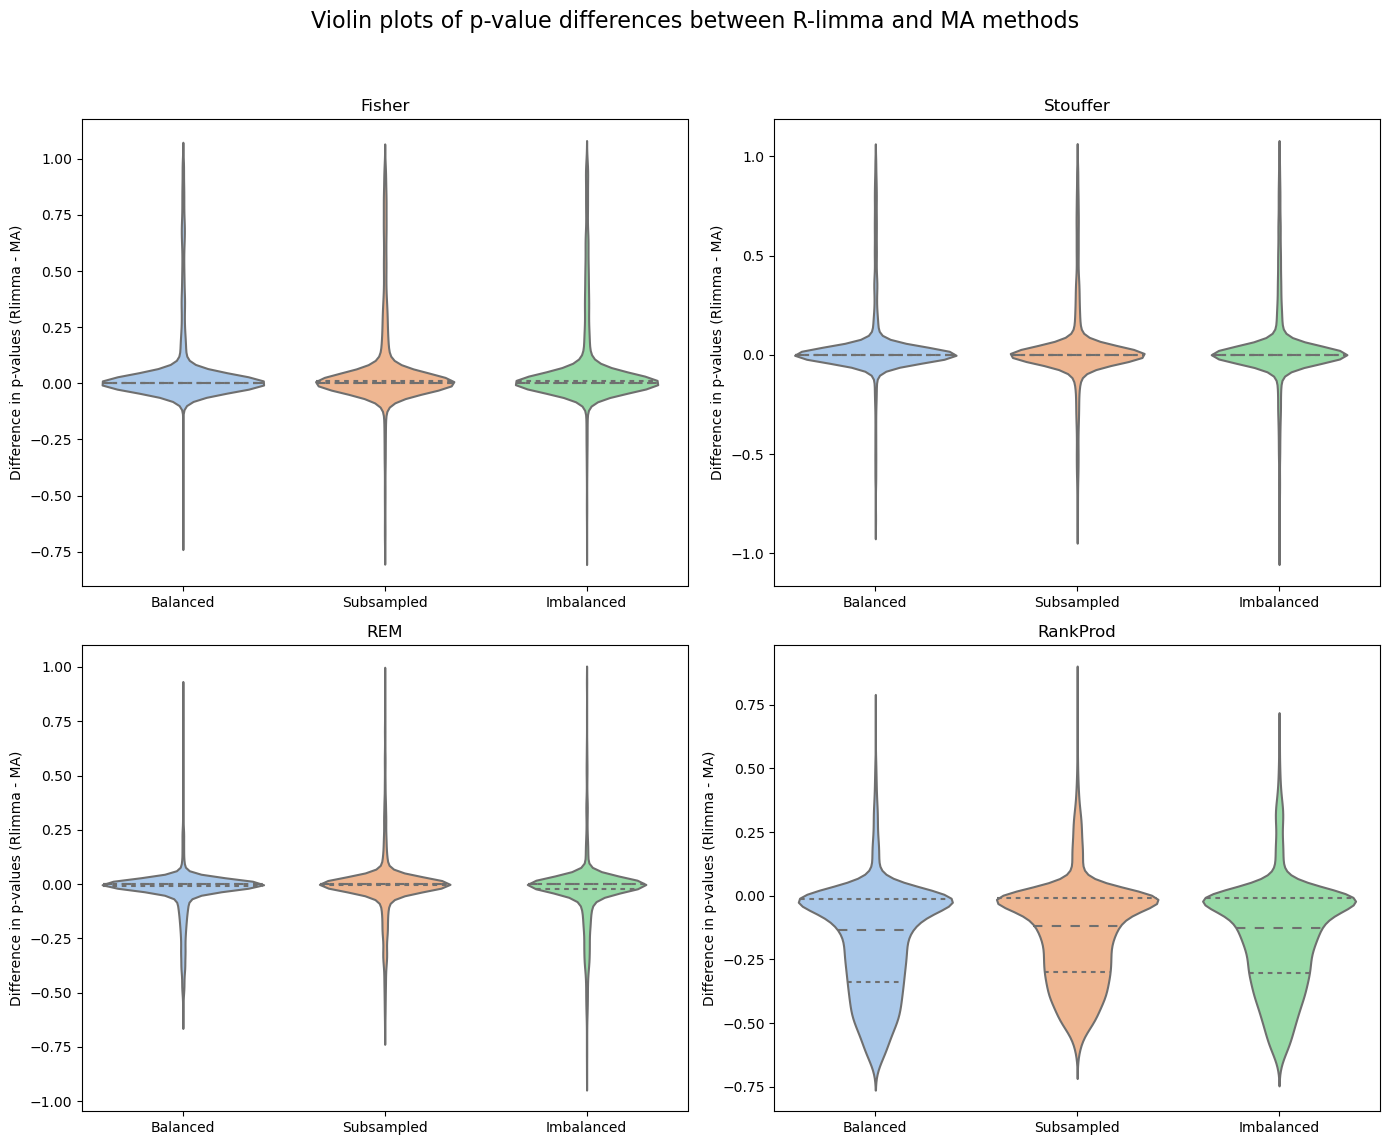

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate differences
diff_data = []
MA_methods = ["Fisher","Stouffer","REM","RankProd"]

for dataset in dfs_scap_not_log:
    for MA_method in MA_methods:
        diff_pval = dfs_scap_not_log[dataset]['pv_Rlimma'] - dfs_scap_not_log[dataset][f'pv_{MA_method}']
        for diff in diff_pval:
            diff_data.append({"Dataset": dataset, "Method": MA_method, "Difference": diff})

# Convert to DataFrame for plotting
diff_df = pd.DataFrame(diff_data)

# Plot
# # Plot without the split option
# plt.figure(figsize=(15, 8))
# sns.violinplot(x="Dataset", y="Difference", hue="Method", data=diff_df, inner="quartile", palette="muted")
# plt.title("Violin plot of p-value differences between Rlimma and MA methods")
# plt.ylabel("Difference in p-values (Rlimma - MA)")
# plt.legend(loc='upper right')
# plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.suptitle("Violin plots of p-value differences between R-limma and MA methods", fontsize=16)

for ax, MA_method in zip(axes.ravel(), MA_methods):
    sns.violinplot(x="Dataset", y="Difference", 
                   data=diff_df[diff_df["Method"] == MA_method], 
                   ax=ax, inner="quartile", palette="pastel")
    ax.set_title(MA_method)
    ax.set_ylabel("Difference in p-values (Rlimma - MA)")
    ax.set_xlabel("")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
calculate_differences(dfs)

Balanced                          Subsampled  \
         p-value difference logFC difference p-value difference   
                       mean             mean               mean   
FedProt        7.886997e-13     1.740385e-14       5.510080e-13   
Fisher         2.565480e+01     3.008852e-03       1.176890e+01   
Stouffer       4.091955e+00     3.008852e-03       2.191949e+00   
REM            1.775865e+01     1.695829e-02       1.472394e+01   
RankProd       1.594684e+01     3.008852e-03       7.082547e+00   

                                  Imbalanced                   
         logFC difference p-value difference logFC difference  
                     mean               mean             mean  
FedProt      2.431069e-14       5.139940e-13     2.054257e-14  
Fisher       1.714867e-03       1.373801e+01     1.118329e-02  
Stouffer     1.714867e-03       2.501273e+00     1.118329e-02  
REM          3.307670e-02       1.187949e+01     3.416127e-02  
RankProd     1.714867e-03       8.121806e+00     1.118329e-02

Balanced                         Imbalanced                        
                 r         ρ          RMSE          r         ρ          RMSE
FedProt   1.000000  1.000000  1.117098e-12   1.000000  1.000000  7.113134e-13
Fisher    0.979809  0.952473  3.443734e+01   0.974095  0.930525  1.893044e+01
Stouffer  0.986827  0.961476  5.105709e+00   0.980550  0.932268  3.106818e+00
REM       0.793242  0.913633  4.626417e+01   0.760068  0.905647  3.636590e+01
RankProd  0.772213  0.880505  2.433440e+01   0.774668  0.856538  1.254560e+01

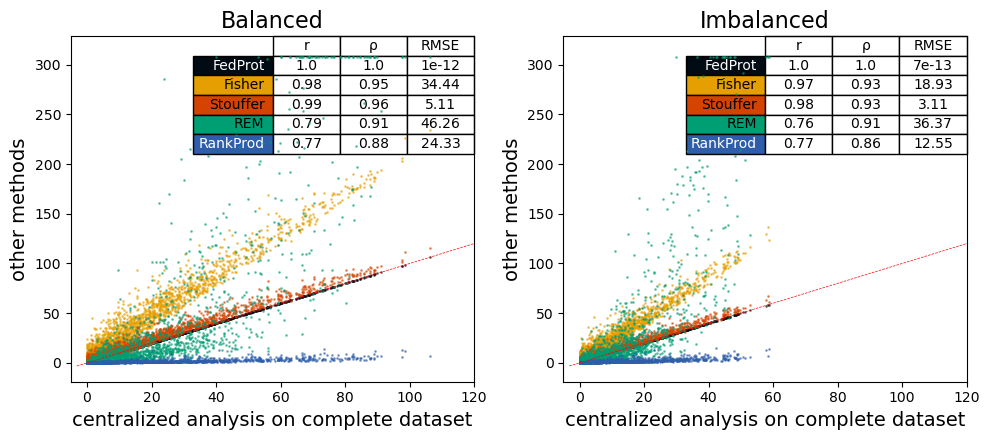

In [ ]:
# colors = ['#010B13', '#E69F00', '#CC79A7', '#009E73', '#56B4E9']
colors = ["#010B13","#E69F00","#D44400","#009E73","#2E5EAA"]
#colors = ["#010B13","#D44500","#FFFB0A","#009E73","#2E5EAA"]


corrs = plt_results(dfs, text = "", colors = colors)
plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation_on_scap/plots/" + "Fig3B_prototype.png", dpi=1200)
corrs